<a href="https://colab.research.google.com/github/jvrupp/EstatisticaML/blob/main/classificacaoCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dados=pd.read_csv('/content/drive/MyDrive/DadosML/credit_data.csv')#
dados.head()
dados.describe()
nan

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:

data_age_payment=dados
data_age_payment.loc[data_age_payment['age'] < 0,['age']] = 40.92#EXTREMAMENTE PERFORMATICO
#Excluindo idades negativas
data_age_payment.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927689,4444.369695,0.141500
std,577.494589,14326.327119,13.261825,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.072097,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
np.unique(data_age_payment['default'],return_counts=True)
#oversampling---SMOTE TOMEK LINKS
#undersampling

(array([0, 1]), array([1717,  283]))

Visualizacao dos dados

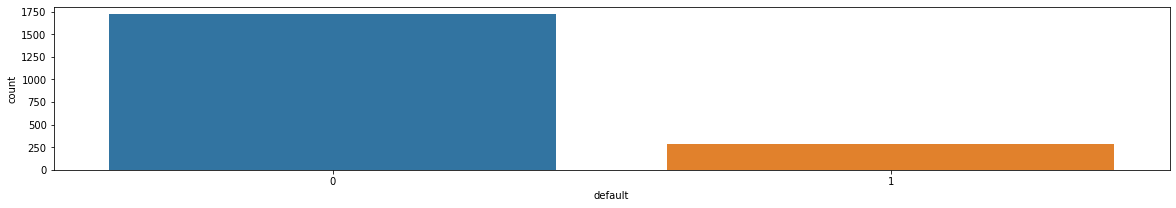

In [ ]:
sns.countplot(x=data_age_payment['default']);

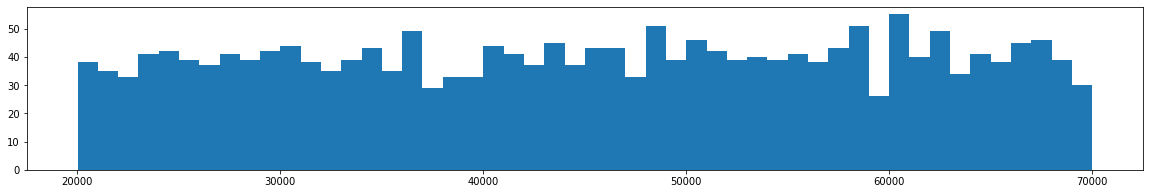

In [ ]:
plt.hist(x=data_age_payment['income'],bins=50);

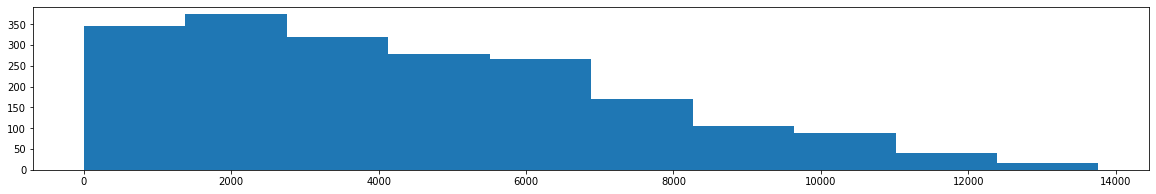

In [ ]:
plt.hist(x=data_age_payment['loan']);

In [ ]:
grafico=px.scatter_matrix(data_age_payment,dimensions=['age','income','loan'],color='default')
grafico.show()

In [ ]:
data_age_payment.loc[data_age_payment['age']>0] #passar condicoes dentro do metodo loc

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Verificando Dados Faltantes


In [ ]:
for i  in data_age_payment.columns:
    print(np.unique(data_age_payment.isnull()[i],return_counts=True),i)

(array([False]), array([2000])) clientid
(array([False]), array([2000])) income
(array([False,  True]), array([1997,    3])) age
(array([False]), array([2000])) loan
(array([False]), array([2000])) default


In [ ]:
data_age_payment.loc[pd.isnull(data_age_payment['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
data_age_payment[pd.isnull(data_age_payment['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#substituindo valores de idade pela media 
data_age_payment.loc[pd.isnull(data_age_payment['age']),['age']]=data_age_payment['age'].mean()

In [ ]:
data_age_payment[pd.isnull(data_age_payment['age'])]

,clientid,income,age,loan,default


In [ ]:
data_age_payment['age'].fillna(data_age_payment['age'].mean,inplace=True)

In [ ]:
data_age_payment['age']= data_age_payment['age'].apply( lambda n : int(n))

In [ ]:
data_age_payment.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.427500,4444.369695,0.141500
std,577.494589,14326.327119,13.256795,3045.410024,0.348624
min,1.000000,20014.489470,18.000000,1.377630,0.000000
25%,500.750000,32796.459717,29.000000,1939.708847,0.000000
50%,1000.500000,45789.117313,41.000000,3974.719419,0.000000
75%,1500.250000,57791.281668,52.000000,6432.410625,0.000000
max,2000.000000,69995.685578,63.000000,13766.051239,1.000000


In [ ]:
from sklearn import tree
X = data_age_payment.iloc[:,1:-1].values
Y = data_age_payment.iloc[:,-1].values
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, Y)

In [ ]:
clf.predict([[150000,21,500000]])

array([1])

In [ ]:
data_age_payment[data_age_payment['default'] == 1].describe()


,clientid,income,age,loan,default
count,283.000000,283.000000,283.000000,283.000000,283.0
mean,971.851590,45412.188607,25.897527,7272.856747,1.0
std,578.110402,14398.556175,4.760218,2581.177563,0.0
min,5.000000,20063.099584,18.000000,2495.132991,1.0
25%,458.500000,33438.770035,22.000000,5445.171674,1.0
50%,976.000000,45980.334345,26.000000,7181.478553,1.0
75%,1470.000000,57544.413627,30.000000,9037.108180,1.0
max,1998.000000,69958.705541,34.000000,13376.797706,1.0


Padronizacao , Stand

In [ ]:
print(X[:,0].min(),X[:,1].min(),X[:,2].min())
print(X[:,0].max(),X[:,1].max(),X[:,2].max())

20014.4894700497 18.0 1.37762959325451
69995.6855783239 63.0 13766.0512393337


In [ ]:
from sklearn.preprocessing import StandardScaler
scalador=StandardScaler()
X_s=scalador.fit_transform(X)

In [ ]:
X_s

array([[ 1.45393393,  1.40133002,  1.20281942],
       [-0.76217555,  0.57135935,  0.69642695],
       [ 0.83682073,  1.70313753,  1.17471147],
       ...,
       [-0.07122592, -0.93767822,  0.35420081],
       [-0.11000289,  1.70313753, -0.92675625],
       [ 1.682986  ,  1.17497438,  0.96381038]])

Base de dados do censo

In [ ]:
censu=pd.read_csv('/content/drive/MyDrive/census.csv')
censu

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
censu.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
censu.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Visualizacao dos dados

In [ ]:
np.unique(censu['income'],return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

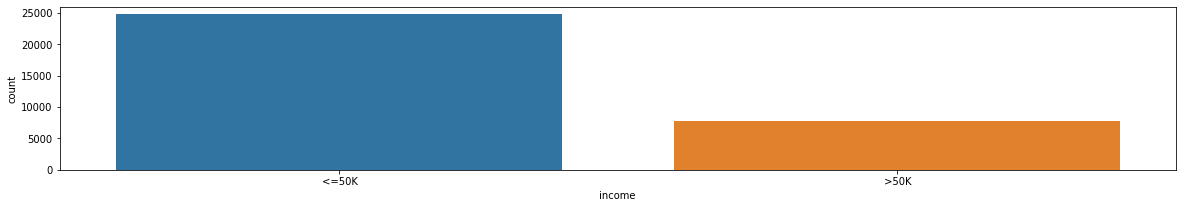

In [ ]:
sns.countplot(x=censu['income'])

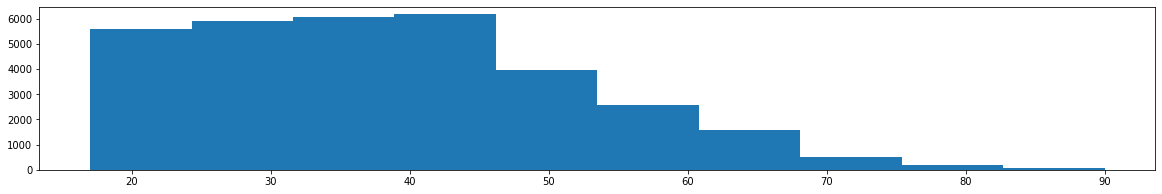

In [ ]:
plt.hist(x=censu['age']);

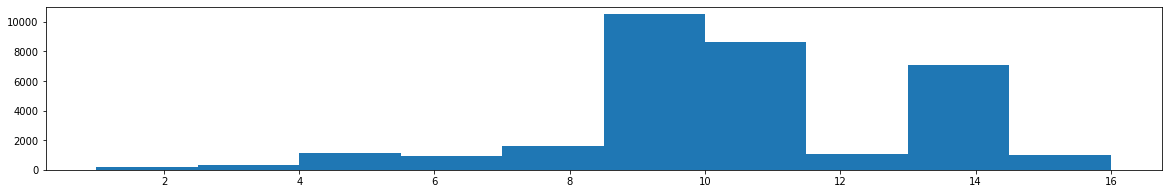

In [ ]:
plt.hist(x=censu['education-num']);

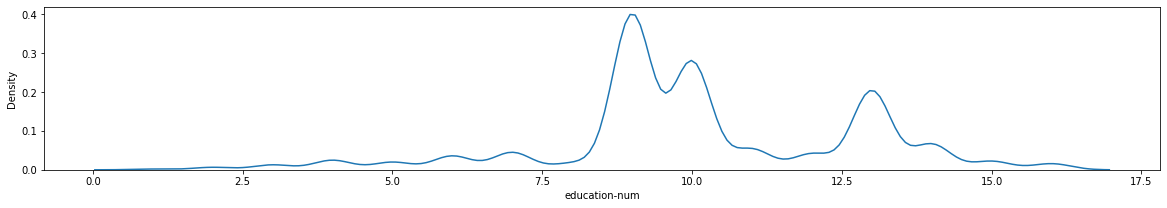

In [ ]:
sns.kdeplot(data=censu,x='education-num')

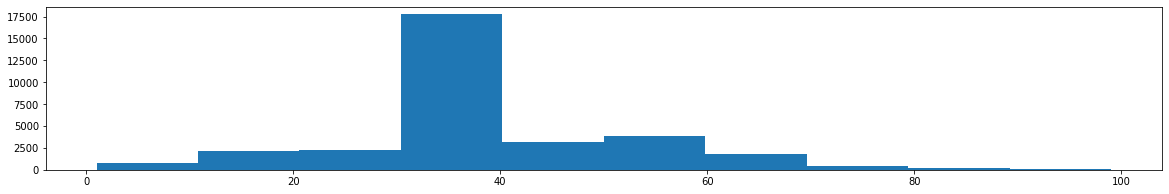

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plt.hist(x=censu['hour-per-week']);

In [ ]:
px.treemap(censu,path=['occupation','relationship','age'])

Variaveis dependentes X Independentes


In [ ]:
X_censu=censu.iloc[:,1:len(censu.columns)-1].values
Y_censu=censu.iloc[:,-1].values

In [ ]:
X_censu

array([[' State-gov', 77516, ' Bachelors', ..., 0, 40, ' United-States'],
       [' Self-emp-not-inc', 83311, ' Bachelors', ..., 0, 13,
        ' United-States'],
       [' Private', 215646, ' HS-grad', ..., 0, 40, ' United-States'],
       ...,
       [' Private', 151910, ' HS-grad', ..., 0, 40, ' United-States'],
       [' Private', 201490, ' HS-grad', ..., 0, 20, ' United-States'],
       [' Self-emp-inc', 287927, ' HS-grad', ..., 0, 40,
        ' United-States']], dtype=object)

Tratando atributos categoricos


In [ ]:
from sklearn import preprocessing

In [ ]:
labe_encoder_workclass=preprocessing.LabelEncoder()
labe_encoder_education=preprocessing.LabelEncoder()
labe_encoder_marital_status=preprocessing.LabelEncoder()
labe_encoder_occupation=preprocessing.LabelEncoder()
labe_encoder_relationship=preprocessing.LabelEncoder()
labe_encoder_race=preprocessing.LabelEncoder()
labe_encoder_sex=preprocessing.LabelEncoder()
labe_encoder_native_country=preprocessing.LabelEncoder()


X_censu[:,0]=labe_encoder_workclass.fit_transform(X_censu[:,0])
X_censu[:,2]=labe_encoder_education.fit_transform(X_censu[:,2])
X_censu[:,4]=labe_encoder_marital_status.fit_transform(X_censu[:,4])
X_censu[:,5]=labe_encoder_occupation.fit_transform(X_censu[:,5])
X_censu[:,6]=labe_encoder_relationship.fit_transform(X_censu[:,6])
X_censu[:,7]=labe_encoder_race.fit_transform(X_censu[:,7])
X_censu[:,8]=labe_encoder_sex.fit_transform(X_censu[:,8])
X_censu[:,12]=labe_encoder_native_country.fit_transform(X_censu[:,12])

In [ ]:
X_censu

array([[7, 77516, 9, ..., 0, 40, 39],
       [6, 83311, 9, ..., 0, 13, 39],
       [4, 215646, 11, ..., 0, 40, 39],
       ...,
       [4, 151910, 11, ..., 0, 40, 39],
       [4, 201490, 11, ..., 0, 20, 39],
       [5, 287927, 11, ..., 0, 40, 39]], dtype=object)

OneHotEncoder


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
OneHotEncodeSensus=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[0,2,4,5,6,7,8,12])],remainder='passthrough')
X_censu=OneHotEncodeSensus.fit_transform(X_censu).toarray()

In [ ]:
X_censu.shape

(32561, 107)

In [ ]:
X_censu

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escalador2=StandardScaler()
X_censu=escalador2.fit_transform(X_censu)

In [ ]:
X_censu[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
label_encoder_income=preprocessing.LabelEncoder()
Y_censu=label_encoder_income.fit_transform(Y_censu)

In [ ]:

X_train,X_test,Y_train,Y_test=train_test_split(X_censu,Y_censu,test_size=0.15,random_state=0)

In [ ]:
Y_test.shape

(4885,)

SALVANDO OS DADOS...


In [ ]:
import pickle

NaiveBayes


In [ ]:
data_credit=pd.read_csv('/content/drive/MyDrive/DadosML/risco_credito.csv')


X_risk_credit=data_credit.iloc[:,0:-1]
Y_risk_credit=data_credit.iloc[:,-1]


data_credit.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [ ]:
scaler_risk=preprocessing.LabelEncoder()

Y_risk_credit=scaler_risk.fit_transform(Y_risk_credit)

scaler_historia=preprocessing.LabelEncoder()
scaler_divida=preprocessing.LabelEncoder()
scaler_garantias=preprocessing.LabelEncoder()
scaler_renda=preprocessing.LabelEncoder()

X_risk_credit.iloc[:,0]=scaler_risk.fit_transform(X_risk_credit.iloc[:,0])
X_risk_credit.iloc[:,1]=scaler_risk.fit_transform(X_risk_credit.iloc[:,1])
X_risk_credit.iloc[:,2]=scaler_risk.fit_transform(X_risk_credit.iloc[:,2])
X_risk_credit.iloc[:,3]=scaler_risk.fit_transform(X_risk_credit.iloc[:,3])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_risk_credit

,historia,divida,garantias,renda
0,2,0,1,0
1,1,0,1,1
2,1,1,1,1
3,1,1,1,2
4,1,1,1,2
5,1,1,0,2
6,2,1,1,0
7,2,1,0,2
8,0,1,1,2
9,0,0,0,2


In [ ]:

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_risk_credit,Y_risk_credit)
pred=clf.predict([[0,0,1,2]])
print(pred)
print(Y_risk_credit)

[1]
[0 0 2 0 1 1 0 2 1 1 0 2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [ ]:
print(clf.classes_)
print(clf.class_count_)
print(clf.class_prior_)

[0 1 2]
[6. 5. 3.]
[0.42857143 0.35714286 0.21428571]


Base_credito


In [ ]:

X_train_C,X_test_C,Y_train_C,Y_test_C=train_test_split(X,Y,test_size=0.10,random_state=0)

In [ ]:
clf2=GaussianNB()
clf2.fit(X_train_C,Y_train_C)
pred2=clf2.predict(X_test_C)
print(pred2)
print(Y_test_C)


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]


Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_C,pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       172
           1       0.84      0.75      0.79        28

    accuracy                           0.94       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.94      0.94      0.94       200

